In [2]:
%pip install pandas

In [3]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
import os
import pandas as pd
import numpy as np

In [4]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [5]:
def createdataframe(dir):
    image_paths = []
    labels = []

    for label in os.listdir(dir):
        label_path = os.path.join(dir, label)

        for image in os.listdir(label_path):
            image_paths.append(os.path.join(label_path, image))
            labels.append(label)

        print(label, "completed")

    return image_paths, labels


In [6]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [8]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [9]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [10]:
!pip install tqdm

In [11]:
from tqdm.notebook import tqdm

In [12]:
from tqdm.notebook import tqdm
import numpy as np
from keras.preprocessing.image import load_img

def extract_features(images):
    features = []

    for image in tqdm(images):
        img = load_img(
            image,
            color_mode='grayscale',
            target_size=(48, 48)
        )
        img = np.array(img)
        features.append(img)

    # 🔹 OUTSIDE the loop
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

        

In [13]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [14]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [15]:
%pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [16]:
x_train = train_features/255.0
x_test = test_features/255.0

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [19]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [20]:
y_train = to_categorical(y_train,num_classes= 7)
y_test = to_categorical(y_test,num_classes= 7)

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input

model = Sequential()

# input layer
model.add(Input(shape=(48, 48, 1)))

# convolutional layers
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(7, activation='softmax'))


In [22]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    "best_emotion_model.keras",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)


In [24]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_accuracy",
    patience=8,
    restore_best_weights=True
)


In [25]:
model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=100,
    validation_data=(x_test, y_test),
    callbacks=[early_stop, checkpoint]
)


Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 637ms/step - accuracy: 0.2369 - loss: 1.8453
Epoch 1: val_accuracy improved from None to 0.25828, saving model to best_emotion_model.keras
226/226 ━━━━━━━━━━━━━━━━━━━━ 155s 680ms/step - accuracy: 0.2446 - loss: 1.8245 - val_accuracy: 0.2583 - val_loss: 1.8088
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - accuracy: 0.2493 - loss: 1.8091
Epoch 2: val_accuracy improved from 0.25828 to 0.26408, saving model to best_emotion_model.keras
226/226 ━━━━━━━━━━━━━━━━━━━━ 153s 675ms/step - accuracy: 0.2501 - loss: 1.8045 - val_accuracy: 0.2641 - val_loss: 1.7674
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.2756 - loss: 1.7487
Epoch 3: val_accuracy improved from 0.26408 to 0.38494, saving model to best_emotion_model.keras
226/226 ━━━━━━━━━━━━━━━━━━━━ 151s 670ms/step - accuracy: 0.2970 - loss: 1.7185 - val_accuracy: 0.3849 - val_loss: 1.5994
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 672ms/step - accuracy: 0.3591 - loss: 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 879ms/step - accuracy: 0.6266 - loss: 1.0000
Epoch 42: val_accuracy did not improve from 0.60996
226/226 ━━━━━━━━━━━━━━━━━━━━ 209s 925ms/step - accuracy: 0.6285 - loss: 0.9986 - val_accuracy: 0.6020 - val_loss: 1.0644
Epoch 43/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - accuracy: 0.6230 - loss: 0.9985
Epoch 43: val_accuracy improved from 0.60996 to 0.61407, saving model to best_emotion_model.keras
226/226 ━━━━━━━━━━━━━━━━━━━━ 158s 701ms/step - accuracy: 0.6235 - loss: 0.9981 - val_accuracy: 0.6141 - val_loss: 1.0343
Epoch 44/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 654ms/step - accuracy: 0.6247 - loss: 0.9941
Epoch 44: val_accuracy did not improve from 0.61407
226/226 ━━━━━━━━━━━━━━━━━━━━ 157s 696ms/step - accuracy: 0.6242 - loss: 0.9922 - val_accuracy: 0.6139 - val_loss: 1.0395
Epoch 45/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - accuracy: 0.6304 - loss: 0.9807
Epoch 45: val_accuracy did not improve from 0.61407
226/226 ━━━━━━━━━━━━━━━━━━━━ 159s 70

KeyboardInterrupt: 

In [1]:
from tensorflow.keras.models import load_model

model = load_model("best_emotion_model.keras")


In [2]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [3]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np


In [4]:
def ef(image):
    img = load_img(image, color_mode='grayscale', target_size=(48, 48))
    feature = img_to_array(img)
    feature = feature.reshape(1, 48, 48, 1)
    feature = feature / 255.0   # normalize (important!)
    return feature

    

In [7]:
image = 'images/train/happy/64.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)


original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
model prediction is  happy


In [8]:
image = 'images/train/happy/111.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
model prediction is  happy


In [16]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
model prediction is  fear


In [17]:
image = 'images/train/sad/154.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
model prediction is  sad


In [18]:
image = 'images/train/angry/22.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
model prediction is  angry


In [20]:
!pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 645.7 kB/s eta 0:00:12
   --- ------------------------------------ 0.8/8.1 MB 763.2 kB/s eta 0:00:10
   --- ------------------------------------ 0.8/8.1 MB 763.2 kB/s eta 0:00:10
   ----- ---------------------------------- 1.0/8.1 MB 762.8 kB/s eta 0:00:10
   ------ --------------------------------- 1.3/8.1 MB 849.7 kB/s eta 0:00:09
   ------- -------------------------------- 1.6/8.1 MB 922.4 kB/s eta 0:00:08
   --------- ------------------------------ 1.8/8.1 MB 932.3 kB/s eta 0:00:07
   ---------- ----------------------------- 2.1/8.1 MB 962.8 kB/s eta 0:00:07
   ----------- ---------------------

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
model prediction is  happy


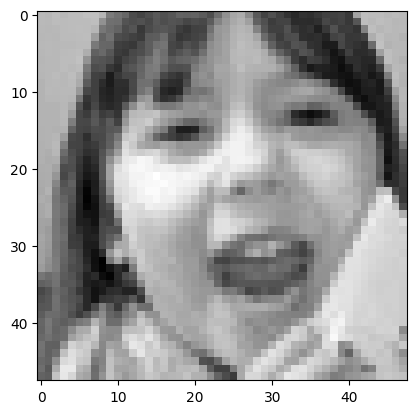

In [6]:
image = 'images/train/happy/111.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
model prediction is  fear


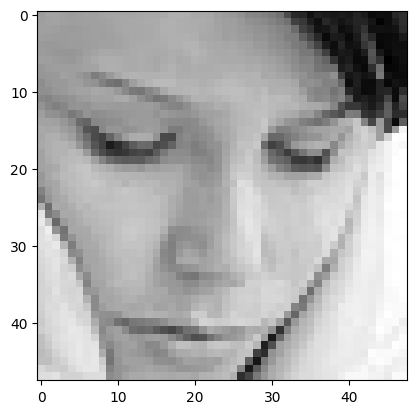

In [7]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
model prediction is  angry


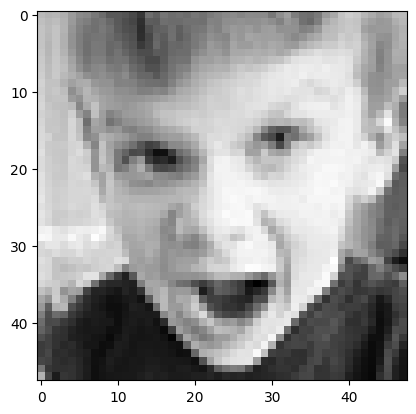

In [8]:
image = 'images/train/angry/107.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
model prediction is  disgust


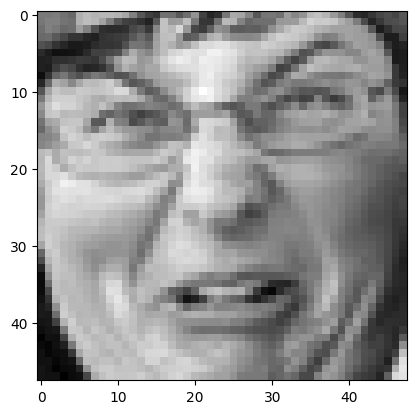

In [7]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')